# Поиск аномалий. Часть 1.

## Через визуализацию

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Box plot (ящик с усами)

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pylab as plt
%pylab inline

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

Populating the interactive namespace from numpy and matplotlib


C:\Users\IbnSina\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


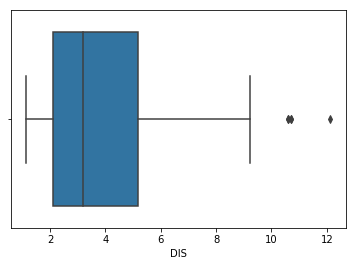

In [2]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

## Scatter plot

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# Z-score

Стандартизованная оценка (z-оценка, англ. : Standard score, z-score) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает сколько стандартных отклонений составляет его разброс относительного среднего значения.

**Интуиция.**
Вычисляя Z-score, мы масштабируем и центрируем данные и смотрим на точки, которые находятся далеко от 0. Точки, которые достаточно далеко от 0, считаются выбросами. В большинстве случаев используется порог 3 или -3, т.е. если Z-score больше 3 или меньше -3, то точка считается выбросом.

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

In [ ]:
threshold = 3
print(np.where(z > 3))

Первый массив - список номеров строк, второй - номеров столбцов с выбросами.

In [ ]:
print(z[55][1])

## IQR

IQR (интерквартильный размах) = Q3 - Q1, где Q1, Q3 - 25%- и 75%- квантили распределения соответственно.

In [ ]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Определяем аутлаеры.

In [ ]:
print(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

# Удаление выбросов

## Z-score

In [ ]:
boston_df_o = boston_df[(z < 3).all(axis=1)]

In [ ]:
boston_df.shape, boston_df_o.shape

## IQR

In [ ]:
boston_df_o1 = boston_df

In [ ]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
boston_df_out.shape

### Удалять или корректировать выбросы?

Это зависит от каждой конкретной задачи.

## Удаление выбросов, основанное на нормальном распределении

In [ ]:
import numpy

arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd) or (x < mean + 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
len(arr), len(final_list)

# Задание

Поработаем с Титаником. Найдите выбросы в каждом столбце (попробуйте наибольшее число из описанных способов).

Изучите найденные выбросы. Подумайте, стоит ли их удалять?

Обучите любой алгоритм на исходных данных с выбросами. Затем удалите те выбросы, которые решили удалить и заново обучите этот же алгоритм. Как удаление выбросов повлияло на качество?

In [ ]:
df = pd.read_csv("titanic_train.csv")
df.head()

In [ ]:
#your code here

# Isolation forest

Сгенерируем данные и посмотрим на них

In [ ]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [ ]:
# Plotting generated data ----

plt.figure(figsize=(10,10))
plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=300)

plt.show()

Обучим IsolationForest и сделаем предсказание на наших данных

In [ ]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [ ]:
# new, 'normal' observations
print("Accuracy:", len(y_pred_test[y_pred_test==1])/len(y_pred_test))

In [ ]:
# outliers
print("Accuracy:", len(y_pred_outliers[y_pred_outliers==-1])/len(y_pred_outliers))

Визуализируем найденные выбросы

In [ ]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.figure(figsize=(10,10))
plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()

### Поработаем с датасетом glass https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [ ]:
import csv

# read flash.dat to a list of lists
datContent = [i.strip().split() for i in open("glass.data").readlines()]
datContent = [elem[0].split(',') for elem in datContent]

df = pd.DataFrame(datContent, columns=['id','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
del df['id']
df = df.astype(float)
df.head()

In [ ]:
X = df.copy()
y = df['f10']
del X['f10']

Посмотрите на качество логистической регрессии на этих данных на кросс-валидации, используйте функцию cross_val_score и 3 фолда.

In [ ]:
#your code here

Удалите выбросы. Предположим, что их не более 10% в наших данных, т.е. используйте IsolationForest с параметром contamination=0.1.

In [ ]:
#your code here

Оставьте только точки, которые не являются выбросами по мнению IsolationForest и заново обучите логистическую регрессию на кросс-валидации. Как изменилось качество?

In [ ]:
#your code here